In [1]:
import pandas as pd
from path import Path
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

### Data Preparation

In [2]:
file = Path('crypto_data.csv')

In [3]:
crypto_df = pd.read_csv(file, index_col=0)
crypto_df.head(10)

,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
365,365Coin,X11,True,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,True,PoW,NaN,611000
808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
1337,EliteCoin,X13,True,PoW/PoS,2.927942e+10,314159265359
2015,2015 coin,X11,True,PoW/PoS,NaN,0
BTC,Bitcoin,SHA-256,True,PoW,1.792718e+07,21000000
ETH,Ethereum,Ethash,True,PoW,1.076842e+08,0
LTC,Litecoin,Scrypt,True,PoW,6.303924e+07,84000000


In [4]:
# Select only cryptocurrencies that are being traded
crypto_df = crypto_df[crypto_df['IsTrading'] == True]
crypto_df.head()

,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
365,365Coin,X11,True,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,True,PoW,NaN,611000
808,808,SHA-256,True,PoW/PoS,0.000000e+00,0


In [5]:
# Delete the IsTrading column; it is no longer necessary
crypto_df = crypto_df.drop(columns ='IsTrading')
crypto_df.head()

,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
365,365Coin,X11,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,PoW,NaN,611000
808,808,SHA-256,PoW/PoS,0.000000e+00,0


In [6]:
# Check null values
crypto_df.isnull().sum()

CoinName             0
Algorithm            0
ProofType            0
TotalCoinsMined    459
TotalCoinSupply      0
dtype: int64

In [7]:
# Delete all rows with null values
crypto_df = crypto_df.dropna()

In [8]:
# Check null values removed
crypto_df.isnull().sum()

CoinName           0
Algorithm          0
ProofType          0
TotalCoinsMined    0
TotalCoinSupply    0
dtype: int64

In [9]:
# Sort values in TotalCoinsMined to identify negative or zero values
crypto_df.sort_values('TotalCoinsMined')

,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
FIII,Fiii,SHA3-256,DPoC,-5.917978e+09,5000000000
LBTC,LiteBitcoin,Scrypt,PoW,0.000000e+00,1000000000
RIPO,RipOffCoin,Scrypt,PoW,0.000000e+00,12000000
BASH,LuckChain,Scrypt,PoW/PoS,0.000000e+00,1000000000
CSH,CashOut,SHA-256,PoW,0.000000e+00,100000000
...,...,...,...,...,...
QWC,Qwertycoin,CryptoNight Heavy,PoW,9.955311e+10,184470000000
NYC,NewYorkCoin,Scrypt,PoW,1.430067e+11,0
GCN,gCn Coin,Scrypt,PoW,1.630551e+11,200000000000
BCN,ByteCoin,CryptoNight,PoW,1.840668e+11,184467440735


In [10]:
# Select only rows with positive TotalCoinsMined values
crypto_df = crypto_df[crypto_df["TotalCoinsMined"]> 0]
crypto_df.sort_values('TotalCoinsMined')

,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
MOON,MoonCoin,Scrypt,PoW,8.800000e+01,384000000000
SYNC,SyncCoin,X11,PoW/PoS,1.177000e+03,1000
BTB,BitBar,Scrypt,PoW/PoS,4.257948e+04,500000
PLTC,PlatinCoin,CryptoNight,PoW,8.430000e+04,600000518
...,...,...,...,...,...
QWC,Qwertycoin,CryptoNight Heavy,PoW,9.955311e+10,184470000000
NYC,NewYorkCoin,Scrypt,PoW,1.430067e+11,0
GCN,gCn Coin,Scrypt,PoW,1.630551e+11,200000000000
BCN,ByteCoin,CryptoNight,PoW,1.840668e+11,184467440735


In [11]:
# Delete the CoinName column from the original dataframe
crypto_df = crypto_df.drop(columns ='CoinName')
crypto_df.head()

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,Scrypt,PoW/PoS,4.199995e+01,42
404,Scrypt,PoW/PoS,1.055185e+09,532000000
1337,X13,PoW/PoS,2.927942e+10,314159265359
BTC,SHA-256,PoW,1.792718e+07,21000000
ETH,Ethash,PoW,1.076842e+08,0


In [12]:
# Create dummy variables for columns with string values
X = pd.get_dummies(crypto_df, columns=['Algorithm', 'ProofType'])
X

,TotalCoinsMined,TotalCoinSupply,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
42,4.199995e+01,42,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
404,1.055185e+09,532000000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1337,2.927942e+10,314159265359,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
BTC,1.792718e+07,21000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ETH,1.076842e+08,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZEPH,2.000000e+09,2000000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
GAP,1.493105e+07,250000000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
BDX,9.802226e+08,1400222610,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ZEN,7.296538e+06,21000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
# View dummy columns
X.columns

Index(['TotalCoinsMined', 'TotalCoinSupply',
       'Algorithm_1GB AES Pattern Search', 'Algorithm_536',
       'Algorithm_Argon2d', 'Algorithm_BLAKE256', 'Algorithm_Blake',
       'Algorithm_Blake2S', 'Algorithm_Blake2b', 'Algorithm_C11',
       'Algorithm_Cloverhash', 'Algorithm_Counterparty',
       'Algorithm_CryptoNight', 'Algorithm_CryptoNight Heavy',
       'Algorithm_CryptoNight-V7', 'Algorithm_Cryptonight-GPU',
       'Algorithm_DPoS', 'Algorithm_Dagger', 'Algorithm_Dagger-Hashimoto',
       'Algorithm_ECC 256K1', 'Algorithm_Equihash',
       'Algorithm_Equihash+Scrypt', 'Algorithm_Ethash', 'Algorithm_Exosis',
       'Algorithm_Green Protocol', 'Algorithm_Groestl', 'Algorithm_HMQ1725',
       'Algorithm_HybridScryptHash256', 'Algorithm_IMesh',
       'Algorithm_Jump Consistent Hash', 'Algorithm_Keccak',
       'Algorithm_Leased POS', 'Algorithm_Lyra2RE', 'Algorithm_Lyra2REv2',
       'Algorithm_Lyra2Z', 'Algorithm_M7 POW', 'Algorithm_Multiple',
       'Algorithm_NIST5', 'Algor

In [14]:
# Standardize the data
scaler = StandardScaler()
crypto_scaled = scaler.fit_transform(X)

In [15]:
# print the scaled data
crypto_scaled[:5]

array([[-0.11710817, -0.1528703 , -0.0433963 , -0.0433963 , -0.0433963 ,
        -0.06142951, -0.07530656, -0.0433963 , -0.06142951, -0.06142951,
        -0.0433963 , -0.0433963 , -0.19245009, -0.06142951, -0.09740465,
        -0.0433963 , -0.11547005, -0.07530656, -0.0433963 , -0.0433963 ,
        -0.15191091, -0.0433963 , -0.13118084, -0.0433963 , -0.0433963 ,
        -0.08703883, -0.0433963 , -0.0433963 , -0.0433963 , -0.0433963 ,
        -0.06142951, -0.0433963 , -0.08703883, -0.08703883, -0.08703883,
        -0.0433963 , -0.13118084, -0.13840913, -0.13840913, -0.0433963 ,
        -0.06142951, -0.0433963 , -0.07530656, -0.18168574, -0.0433963 ,
        -0.0433963 , -0.0433963 , -0.07530656, -0.15826614, -0.31491833,
        -0.0433963 , -0.08703883, -0.07530656, -0.06142951,  1.38675049,
        -0.0433963 , -0.0433963 , -0.06142951, -0.0433963 , -0.0433963 ,
        -0.0433963 , -0.0433963 , -0.0433963 , -0.0433963 , -0.0433963 ,
        -0.0433963 , -0.39879994, -0.0433963 , -0.1

In [16]:
# Identify the numbers of rows and columns in the scaled data
print(f'rows {len(crypto_scaled)}, cols {len(crypto_scaled[0])}')

rows 532, cols 98


### Reduce dataset dimensions with PCA

In [17]:
# Reduce dimensions with PCA
pca = PCA(n_components=0.90)
crypto_pca = pca.fit_transform(crypto_scaled)
crypto_pca

array([[-3.35098808e-01,  1.03218907e+00, -5.90713438e-01, ...,
         1.14746442e-15,  1.73375535e-15, -1.38818364e-16],
       [-3.18433948e-01,  1.03233143e+00, -5.91125551e-01, ...,
         8.45999419e-16,  1.23307062e-15, -3.19134561e-16],
       [ 2.30546811e+00,  1.65638302e+00, -6.83616670e-01, ...,
        -5.24831674e-14, -6.19706987e-15, -1.49437311e-14],
       ...,
       [ 3.24348535e-01, -2.31230764e+00,  4.21515366e-01, ...,
        -3.27102428e-14,  2.78352016e-14, -3.51557660e-14],
       [-1.49363652e-01, -2.04933553e+00,  4.12968257e-01, ...,
        -9.90078720e-16, -2.05640025e-15, -4.31696804e-15],
       [-2.89957500e-01,  8.21194511e-01, -2.76326847e-01, ...,
         1.65632966e-15, -1.11158168e-15, -2.14725234e-15]])

In [18]:
# Identify the numbers of rows and columns in the pca data
print(f'rows {len(crypto_pca)}, cols {len(crypto_pca[0])}')
print()
print(f'reduced features {len(crypto_scaled) - len(crypto_pca[0])}')

rows 532, cols 74

reduced features 458


In [19]:
# The sum of the explained variance of the principal components
pca.explained_variance_ratio_

array([0.0279317 , 0.02141802, 0.02051615, 0.02044661, 0.0204466 ,
       0.0204466 , 0.0204466 , 0.02042554, 0.01870913, 0.01756291,
       0.01741106, 0.01629007, 0.01596154, 0.01551138, 0.01435005,
       0.01321122, 0.01236583, 0.01206255, 0.01104295, 0.01071499,
       0.01049079, 0.01040887, 0.01039089, 0.01037741, 0.01035414,
       0.01034034, 0.01029605, 0.01028233, 0.01028139, 0.01028139,
       0.01028138, 0.01027965, 0.01027051, 0.01026331, 0.01026202,
       0.01025761, 0.01025565, 0.01025068, 0.01024924, 0.01024279,
       0.01024259, 0.01024259, 0.0102419 , 0.01024018, 0.01023676,
       0.01023495, 0.01023   , 0.01022442, 0.0102233 , 0.0102233 ,
       0.0102233 , 0.0102233 , 0.0102233 , 0.0102233 , 0.0102233 ,
       0.0102233 , 0.0102233 , 0.0102233 , 0.0102233 , 0.0102233 ,
       0.0102233 , 0.0102233 , 0.0102233 , 0.0102233 , 0.0102233 ,
       0.0102233 , 0.0102233 , 0.0102233 , 0.0102233 , 0.0102233 ,
       0.0102233 , 0.0102233 , 0.0102233 , 0.0102233 ])

In [20]:
# Transform PCA data to a DataFrame
transformed_crypto_pca = pd.DataFrame(data=crypto_pca)
transformed_crypto_pca.head()

,0,1,2,3,4,5,6,7,8,9,...,64,65,66,67,68,69,70,71,72,73
0,-0.335099,1.032189,-0.590713,0.001397,2.734816e-12,-5.326378e-15,-1.280445e-15,-0.007129,-1.319756,-0.051813,...,-4.948116e-16,3.888930e-15,-1.114145e-15,-1.150971e-15,-7.726513e-16,-3.626465e-16,-3.860201e-15,1.147464e-15,1.733755e-15,-1.388184e-16
1,-0.318434,1.032331,-0.591126,0.001386,2.712386e-12,-5.457883e-15,-1.429030e-15,-0.007739,-1.322514,-0.056674,...,-4.936877e-16,3.702121e-15,7.995353e-16,-1.148781e-15,-7.102306e-16,-1.603443e-16,-3.350430e-15,8.459994e-16,1.233071e-15,-3.191346e-16
2,2.305468,1.656383,-0.683617,0.004731,9.322259e-12,-7.481406e-15,6.356089e-15,-0.054781,-1.542879,-0.943951,...,-3.646047e-14,-4.706507e-14,1.542434e-14,4.329981e-14,-5.319318e-14,-2.722470e-14,2.747110e-14,-5.248317e-14,-6.197070e-15,-1.494373e-14
3,-0.145184,-1.320593,0.192813,-0.001229,-2.420624e-12,3.040430e-15,-1.007631e-15,-0.002071,0.281463,0.251862,...,-8.634350e-16,-1.033727e-14,-6.523311e-15,8.423110e-15,-1.192233e-14,-5.998331e-16,1.071340e-14,-9.861862e-15,-1.296452e-14,-1.000959e-14
4,-0.151768,-2.036192,0.396182,-0.001705,-3.352037e-12,1.674182e-15,-1.227687e-15,0.027735,0.519099,0.188820,...,1.284903e-13,-4.695079e-14,-1.009913e-13,-1.083722e-14,-1.847076e-14,-1.811094e-13,3.493308e-14,-1.592085e-14,-7.333712e-14,-9.778724e-14


In [21]:
# Reduce dimensions with t-SNE
tsne = TSNE(learning_rate=35)
tsne_features = tsne.fit_transform(transformed_crypto_pca)
tsne_features.shape

(532, 2)

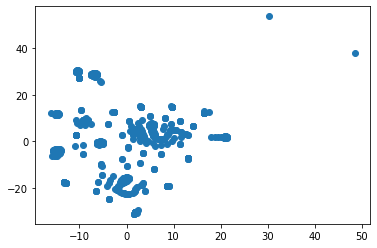

In [22]:
# Plot t-SNE output
# first column of transformed features
x = tsne_features[:,0]
# second column of transformed features
y = tsne_features[:,1]

plt.scatter(x, y)
plt.show()

In [23]:
# Identify clusters with k-means
#  find value for k
inertia = []
k = list(range(1, 11))

# Calculate inertia for the k fom 1 to 10
for i in k:
    km = KMeans(n_clusters=i, random_state=42)
    km.fit(transformed_crypto_pca)
    inertia.append(km.inertia_)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


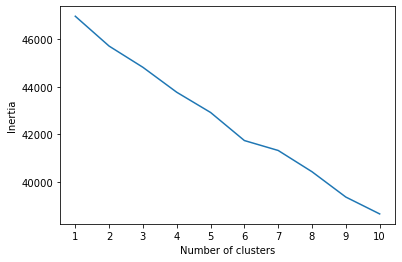

In [24]:
# Create an elbow plot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

plt.show()

No clear elbow in the graph or k beyond which the inertia does not change much. So need to select a number of clusters based on business need or use the silhouette score to find the optimal number of clusters based on data.